**<h1>Impact of AI on Digital Media (2020-2025)<h1>**

<h3>Name: Suman Prasad Neupane<h3>

<h3>University ID: 2060737<h3>

# EDA - What We Can Do with This Dataset

1. Industry-wise AI Adoption Rate
- Objective: Identify which industries have the highest and lowest AI adoption rates.
- Approach: Group the data by the 'Industry' column and calculate the average 'AI Adoption Rate (%)' for each industry.
- Visualization: Use a bar plot to compare the average AI adoption rates across different industries.

2. Country-wise AI Impact on Job Loss
- Objective: Analyze the impact of AI on job loss across different countries.
- Approach: Group the data by 'Country' and calculate the average 'Job Loss Due to AI (%)' for each country.
- Visualization: Use a heatmap or bar chart to highlight the countries most affected by AI-driven job loss.

3. Correlation Between AI Adoption and Revenue Increase
- Objective: Understand the relationship between AI adoption rates and revenue increase.
- Approach: Calculate the correlation between 'AI Adoption Rate (%)' and 'Revenue Increase Due to AI (%)' to see if higher AI adoption leads to better financial performance.
- Visualization: Use a scatter plot with a trend line to visualize this relationship.

4. Consumer Trust in AI by Regulation Status
- Objective: Assess how regulation affects consumer trust in AI.
- Approach: Group the data by 'Regulation Status' and calculate the average 'Consumer Trust in AI (%)' for each regulation type.
- Visualization: Use a box plot or bar chart to compare consumer trust levels across different regulation types (Strict, Moderate, Lenient).

5. Top AI Tools Analysis
- Objective: Identify the most popular AI tools used across industries and countries.
- Approach: Count the occurrences of each tool in the 'Top AI Tools Used' column.
- Visualization: Use a bar plot or word cloud to show the most frequently used AI tools.

# Algorithms, Pre-Processing, and Evaluation Metrics

1. Industry-wise AI Adoption Rate
- Algorithm: Aggregation using group-by operation. (Clustering can be explored if industry segmentation is needed.)
- Pre-Processing: Handle missing or inconsistent data in the 'Industry' and 'AI Adoption Rate (%)' columns, standardize industry names, and remove outliers if necessary.
- Evaluation Metrics: Mean AI Adoption Rate (%).
- Justification: Grouping and averaging provide a straightforward measure of AI adoption by industry, allowing quick identification of leading and lagging sectors.

2. Country-wise AI Impact on Job Loss
- Algorithm: Aggregation with group-by operation. Regression
- Pre-Processing: Clean the 'Country' and 'Job Loss Due to AI (%)' columns, handle missing data, and normalize country names.
- Evaluation Metrics: Accuracy metric
- Justification: Averaging the job loss percentage offers a simple but effective way to assess AI's workforce impact across countries.

3. Correlation Between AI Adoption and Revenue Increase
- Algorithm: Pearson or Spearman correlation. (Consider using regression if a predictive relationship is needed.)
- Pre-Processing: Remove NaN values, ensure numeric consistency, and handle outliers in 'AI Adoption Rate (%)' and 'Revenue Increase Due to AI (%)'.
- Evaluation Metrics: Correlation Coefficient (r-value), R-squared for regression if used.
- Justification: Correlation analysis is crucial for understanding the strength and direction of the relationship between AI adoption and revenue growth.

4. Consumer Trust in AI by Regulation Status
- Algorithm: Group-by with statistical summary. (Consider classification if predicting trust levels based on regulation types.)
- Pre-Processing: Standardize regulation labels and clean the 'Regulation Status' and 'Consumer Trust in AI (%)' columns.
- Evaluation Metrics: Mean and Interquartile Range (IQR) of Consumer Trust (%), accuracy if classification is used.
- Justification: These metrics provide a comprehensive view of trust distribution based on regulatory environments.

5. Top AI Tools Analysis
- Algorithm: Frequency count (or clustering if grouping similar tools).
- Pre-Processing: Tokenize and clean the 'Top AI Tools Used' column, standardize tool names, and remove duplicates.
- Evaluation Metrics: Frequency of tool usage.
- Justification: Counting occurrences is an effective way to identify the most popular tools and technologies in AI.

In [2]:
%pip install pandas matplotlib seaborn wordcloud squarify

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load data
data = pd.read_csv("../Global_AI_Content_Impact_Dataset.csv")

In [4]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null

In [5]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head()

Shape Of The Dataset : (200, 12)

Glimpse Of The Dataset :


,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [6]:
data.tail()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
195,Germany,2021,Automotive,89.44,52.98,48.47,12.14,30.60,DALL-E,Lenient,77.21,44.35
196,Germany,2020,Media,70.11,28.26,27.62,57.86,58.71,DALL-E,Strict,78.74,31.73
197,France,2023,Marketing,65.77,49.83,39.94,79.44,43.73,Synthesia,Lenient,81.58,14.62
198,Australia,2023,Automotive,45.35,20.49,33.21,50.50,41.73,Claude,Strict,47.42,43.11
199,South Korea,2020,Healthcare,10.53,20.97,23.64,34.27,45.67,Stable Diffusion,Moderate,58.52,33.37


In [7]:
data.describe()

,Year,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2022.315000,54.265850,46.07260,25.788250,39.719450,54.102150,59.425150,26.569550
std,1.825496,24.218067,29.16122,13.901105,23.829545,19.247079,17.319668,14.023729
min,2020.000000,10.530000,1.04000,0.090000,0.140000,20.210000,30.120000,1.180000
25%,2021.000000,33.222500,20.32250,14.995000,17.907500,37.770000,44.755000,14.052500
50%,2022.000000,53.310000,44.32000,25.735000,42.100000,54.515000,59.215000,27.390000
75%,2024.000000,76.220000,71.62000,37.417500,58.697500,69.402500,74.885000,38.432500
max,2025.000000,94.760000,99.06000,49.710000,79.550000,88.290000,89.880000,49.280000


# **<h3>EDA - What We Can Do with This Dataset<h3>**

# 1. Industry-wise AI Adoption Rate

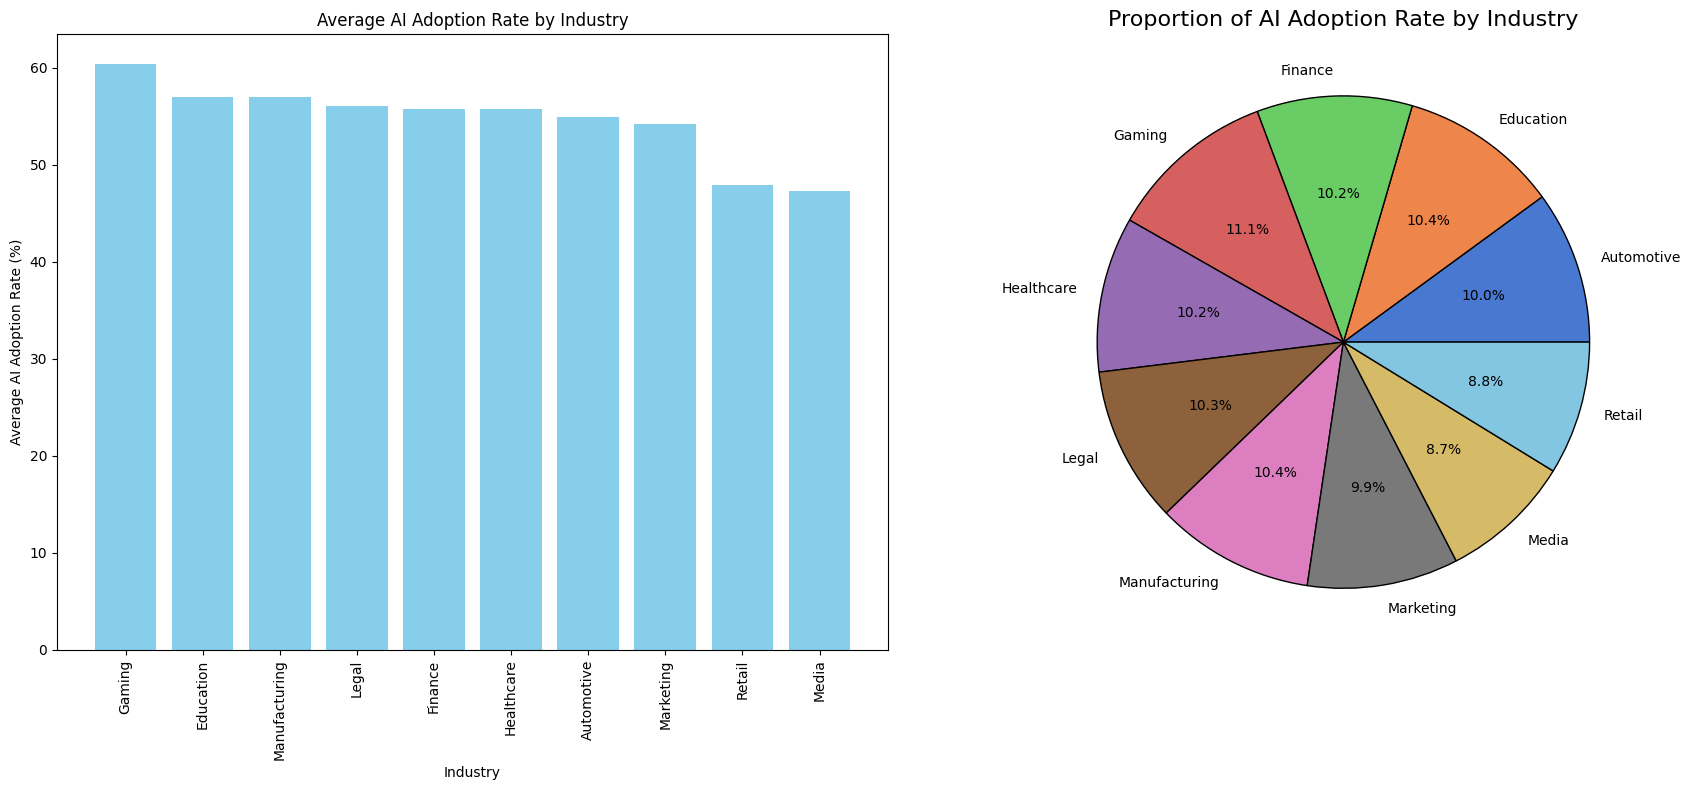

In [8]:
# Pre-processing (Ensure no missing values in key columns)
data.dropna(subset=['Industry', 'AI Adoption Rate (%)'], inplace=True)

# 1. Bar Plot: Average AI Adoption Rate per Industry
avg_adoption_rate = data.groupby('Industry')['AI Adoption Rate (%)'].mean().sort_values(ascending=False)

# 2. Pie Chart: Proportion of AI Adoption Rate by Industry (Average Adoption Rate)
industry_avg = data.groupby('Industry')['AI Adoption Rate (%)'].mean()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bar Plot
axes[0].bar(avg_adoption_rate.index, avg_adoption_rate.values, color='skyblue')
axes[0].set_title('Average AI Adoption Rate by Industry')
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Average AI Adoption Rate (%)')
axes[0].tick_params(axis='x', rotation=90)

# Pie Chart
industry_avg.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('muted', len(industry_avg)),
                wedgeprops={'edgecolor': 'black'}, ax=axes[1])
axes[1].set_title('Proportion of AI Adoption Rate by Industry', fontsize=16)
axes[1].set_ylabel('')  # Hide the y-label for a cleaner look

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# 2. Country-wise AI Impact on Job Loss

/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_99989/2884903523.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_loss_by_country.index, y=job_loss_by_country.values, palette='viridis', ax=axes[1])


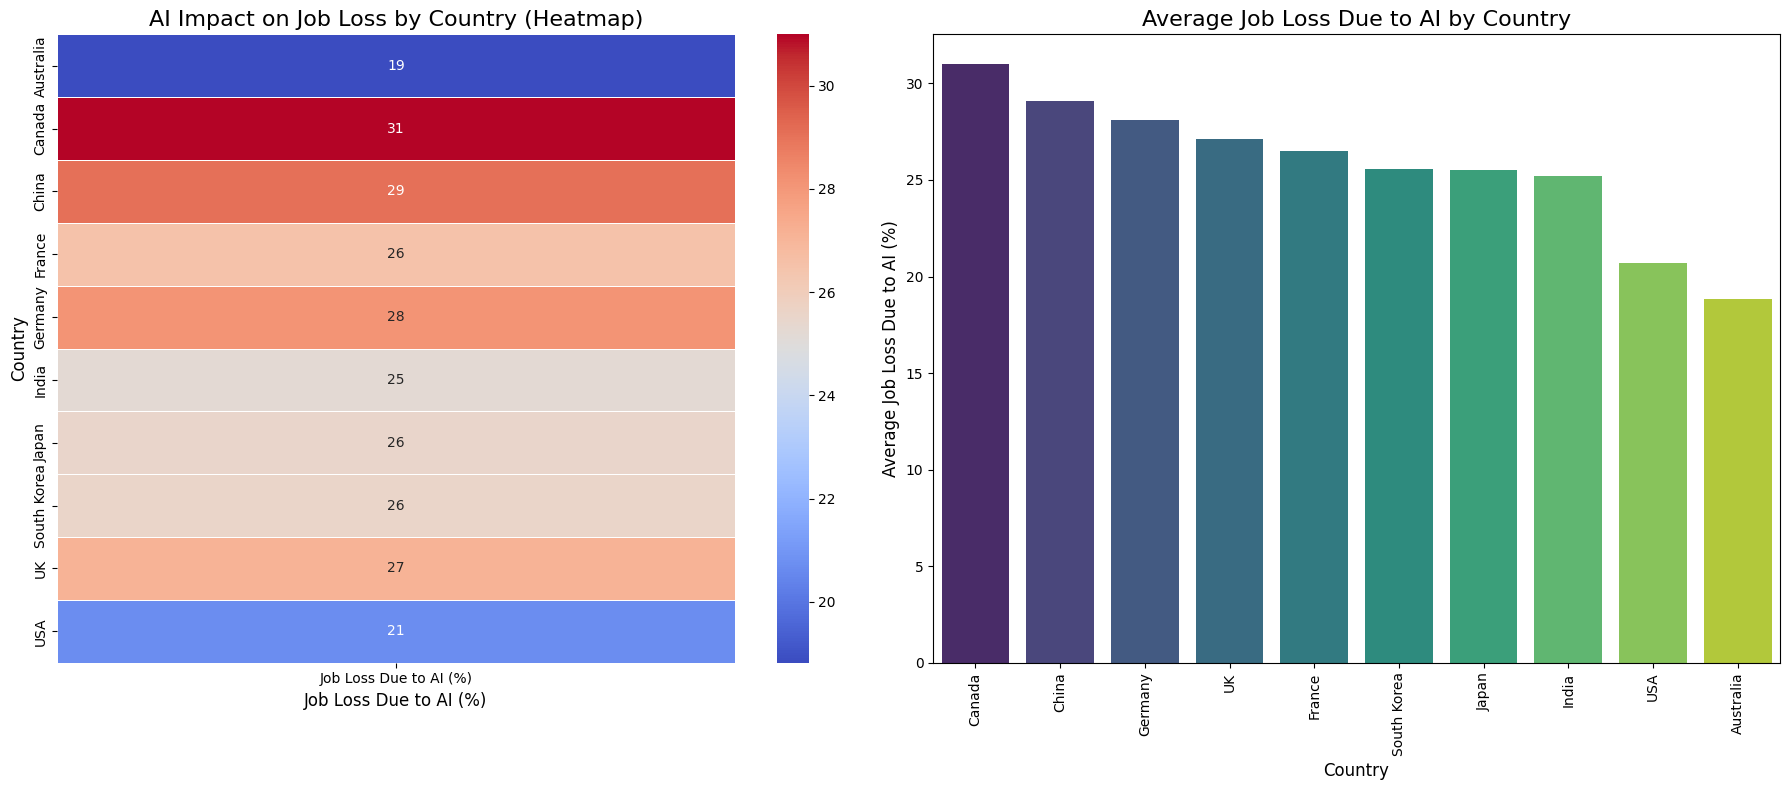

/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_99989/2884903523.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country', y='Job Loss Due to AI (%)', palette='plasma')
/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_99989/2884903523.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Country', y='Job Loss Due to AI (%)', palette='cool')


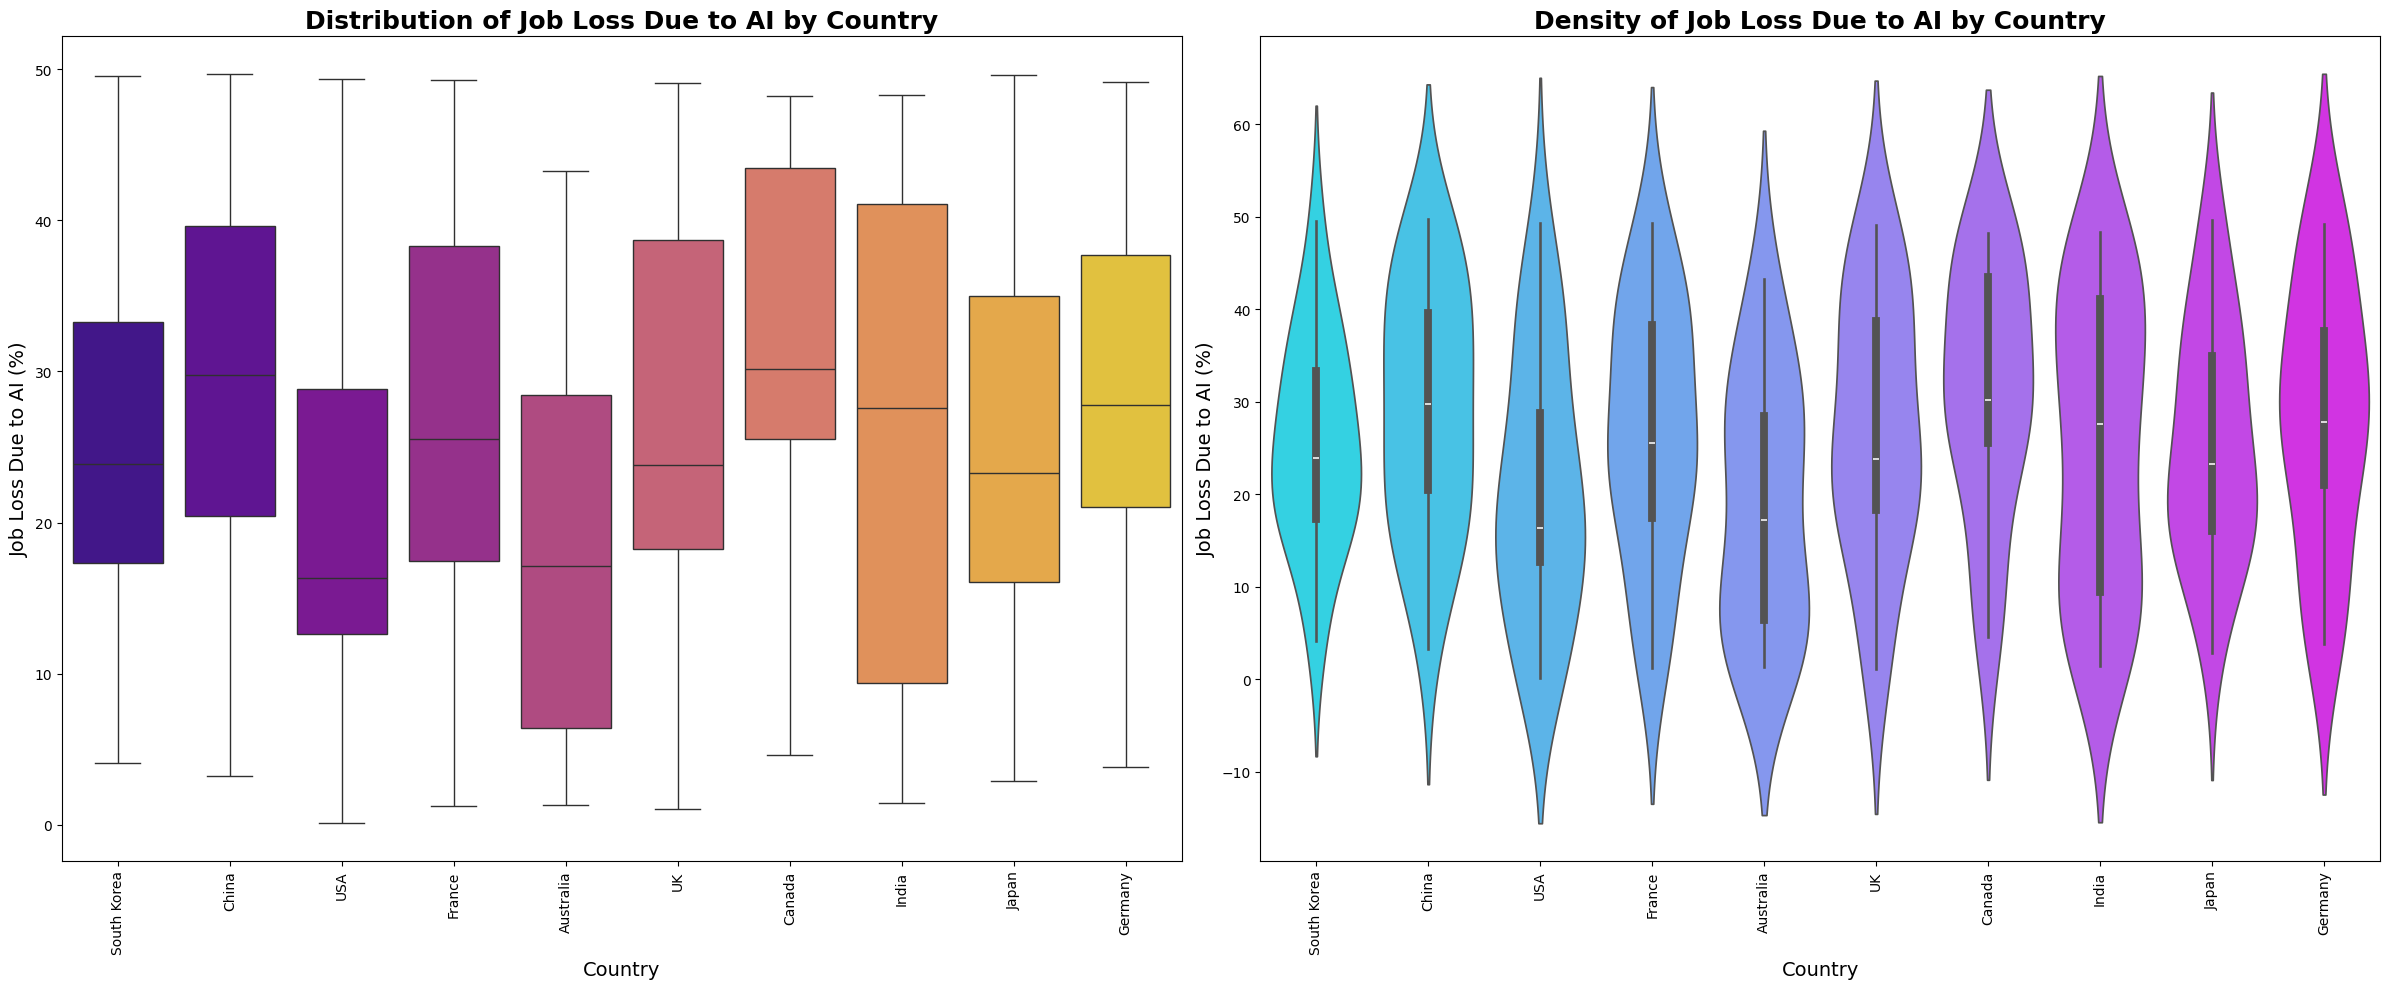

In [9]:
# Pre-processing (Ensure no missing values in key columns)
data.dropna(subset=['Country', 'Job Loss Due to AI (%)'], inplace=True)

# Grouping by 'Country' and calculating the average 'Job Loss Due to AI (%)'
job_loss_by_country = data.groupby('Country')['Job Loss Due to AI (%)'].mean().sort_values(ascending=False)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Heatmap (if we want to visualize a table-like view with color intensities)
job_loss_matrix = job_loss_by_country.reset_index().pivot_table(index='Country', columns=None, values='Job Loss Due to AI (%)')

sns.heatmap(job_loss_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, ax=axes[0])
axes[0].set_title('AI Impact on Job Loss by Country (Heatmap)', fontsize=16)
axes[0].set_xlabel('Job Loss Due to AI (%)', fontsize=12)
axes[0].set_ylabel('Country', fontsize=12)

# 2. Bar Plot (for clearer country-wise comparison)
sns.barplot(x=job_loss_by_country.index, y=job_loss_by_country.values, palette='viridis', ax=axes[1])

# Adding titles and labels for bar plot
axes[1].set_title('Average Job Loss Due to AI by Country', fontsize=16)
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Average Job Loss Due to AI (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#-------------------------------------------------------------
plt.figure(figsize=(24, 10))

# 1. Box Plot - Distribution
plt.subplot(1, 2, 1)
plt.title('Distribution of Job Loss Due to AI by Country', fontsize=18, weight='bold')
sns.boxplot(data=data, x='Country', y='Job Loss Due to AI (%)', palette='plasma')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Job Loss Due to AI (%)', fontsize=14)
plt.xticks(rotation=90)

# # Adding the graph type label
# plt.text(-0.5, data['Job Loss Due to AI (%)'].max() * 1.1, 'Box Plot', fontsize=22, color='darkred', weight='bold')

# 2. Violin Plot - Density
plt.subplot(1, 2, 2)
plt.title('Density of Job Loss Due to AI by Country', fontsize=18, weight='bold')
sns.violinplot(data=data, x='Country', y='Job Loss Due to AI (%)', palette='cool')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Job Loss Due to AI (%)', fontsize=14)
plt.xticks(rotation=90)

# # Adding the graph type label
# plt.text(-0.5, data['Job Loss Due to AI (%)'].max() * 1.1, 'Violin Plot', fontsize=22, color='darkblue', weight='bold')

plt.tight_layout()
plt.show()

# 3. Correlation Between AI Adoption and Revenue Increase

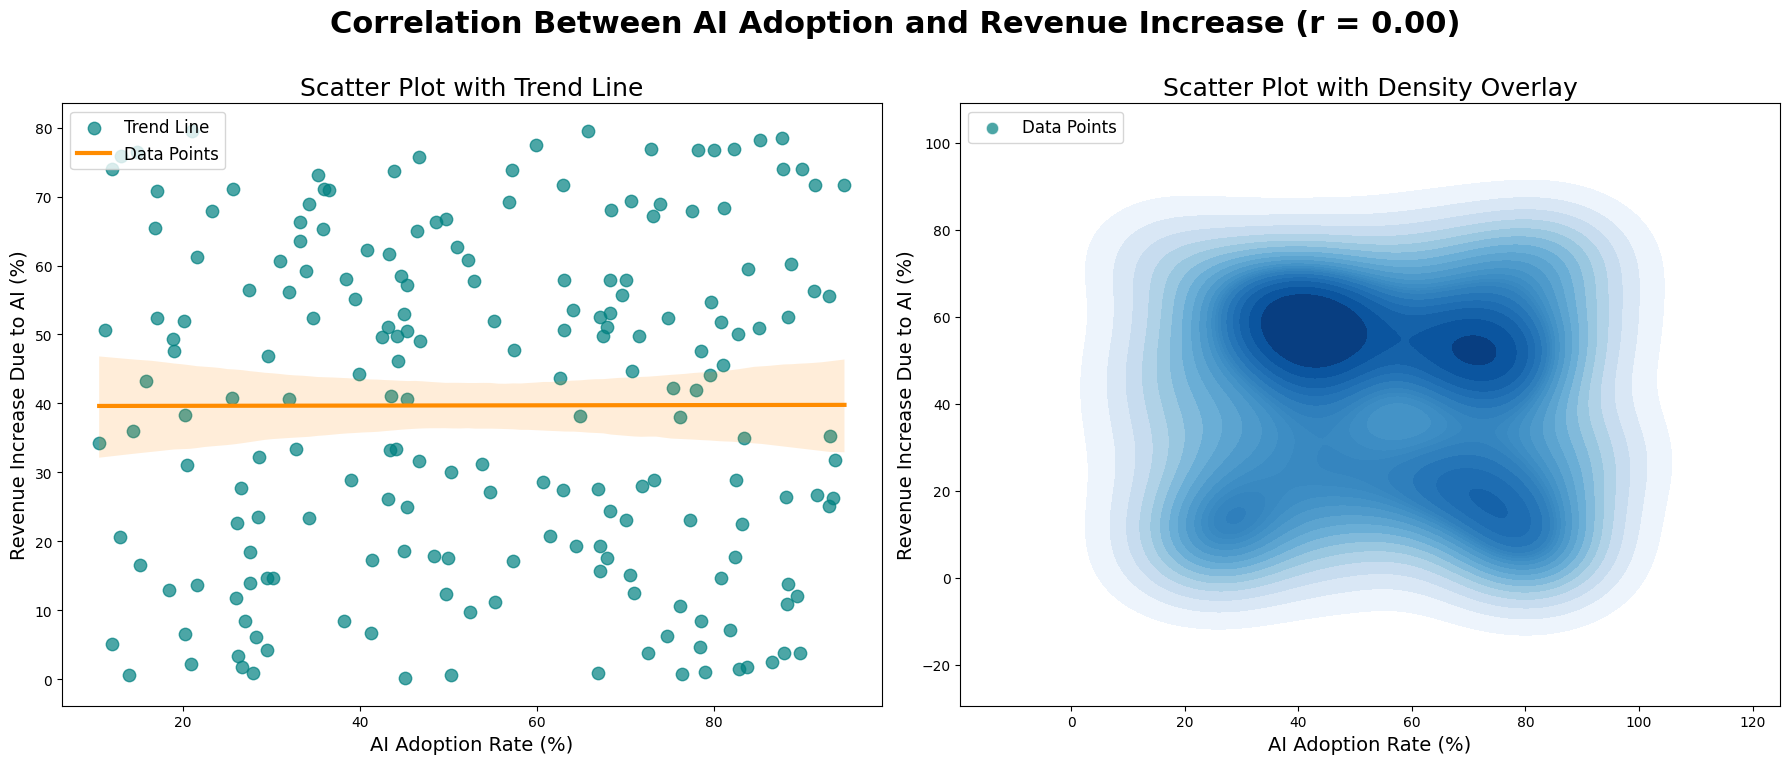

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing (Ensure no missing values in key columns)
data.dropna(subset=['AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)'], inplace=True)

# Calculate correlation
correlation_value = data[['AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)']].corr().iloc[0, 1]

# Create a figure for the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle(f"Correlation Between AI Adoption and Revenue Increase (r = {correlation_value:.2f})", fontsize=22, weight='bold')

# Scatter Plot with Trend Line
sns.regplot(
    x='AI Adoption Rate (%)', 
    y='Revenue Increase Due to AI (%)', 
    data=data, 
    scatter_kws={'s': 80, 'alpha': 0.7, 'color': 'teal'},
    line_kws={'color': 'darkorange', 'lw': 3},
    ax=axes[0]
)
axes[0].set_title("Scatter Plot with Trend Line", fontsize=18)
axes[0].set_xlabel("AI Adoption Rate (%)", fontsize=14)
axes[0].set_ylabel("Revenue Increase Due to AI (%)", fontsize=14)

# Add legend to the scatter plot with trend line
axes[0].legend(['Trend Line', 'Data Points'], loc='upper left', fontsize=12)

# Scatter Plot with Density Overlay
sns.scatterplot(
    x='AI Adoption Rate (%)', 
    y='Revenue Increase Due to AI (%)', 
    data=data, 
    s=80, alpha=0.7, color='teal', ax=axes[1]
)
sns.kdeplot(
    x=data['AI Adoption Rate (%)'], 
    y=data['Revenue Increase Due to AI (%)'], 
    cmap='Blues', fill=True, thresh=0.05, levels=20, ax=axes[1]
)
axes[1].set_title("Scatter Plot with Density Overlay", fontsize=18)
axes[1].set_xlabel("AI Adoption Rate (%)", fontsize=14)
axes[1].set_ylabel("Revenue Increase Due to AI (%)", fontsize=14)

# Add legend to the scatter plot with density overlay
axes[1].legend(['Data Points', 'Density Overlay'], loc='upper left', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


# 4. Consumer Trust in AI by Regulation Status

/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_99989/2696900461.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Regulation Status', y='Consumer Trust in AI (%)', palette='coolwarm', ax=axes[0])
/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_99989/2696900461.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trust_by_regulation.index, y=trust_by_regulation.values, palette='viridis', ax=axes[1])


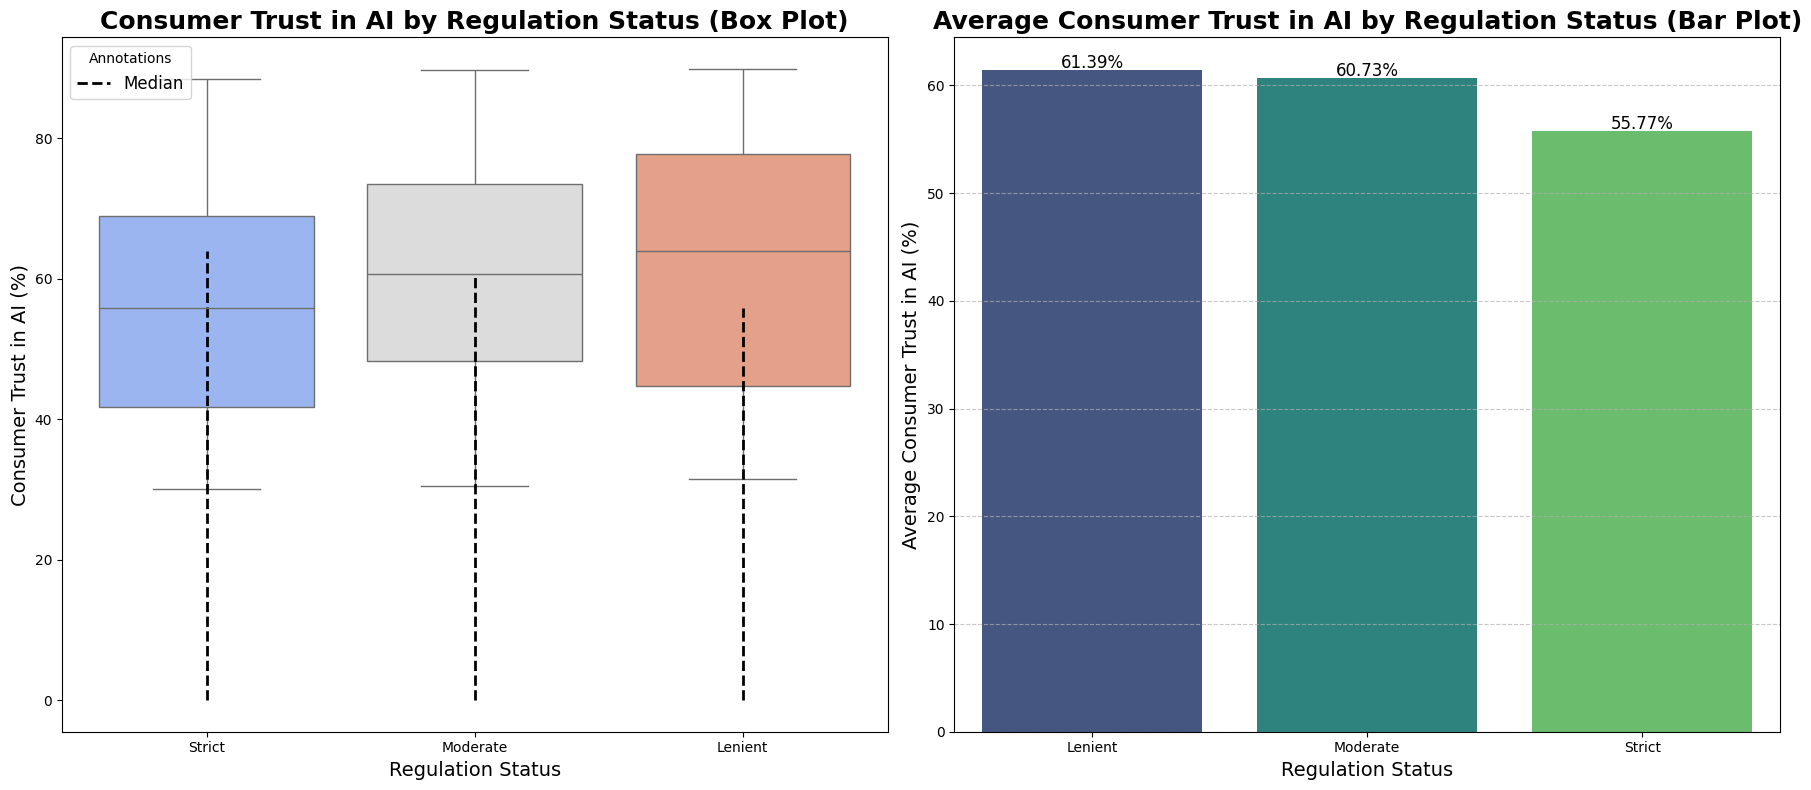

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing (Ensure no missing values in key columns)
data.dropna(subset=['Regulation Status', 'Consumer Trust in AI (%)'], inplace=True)

# Grouping by 'Regulation Status' and calculating the average 'Consumer Trust in AI (%)'
trust_by_regulation = data.groupby('Regulation Status')['Consumer Trust in AI (%)'].mean().sort_values(ascending=False)

# Create a figure for the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Box Plot (Visualizing distribution of trust by regulation status)
sns.boxplot(data=data, x='Regulation Status', y='Consumer Trust in AI (%)', palette='coolwarm', ax=axes[0])
axes[0].set_title('Consumer Trust in AI by Regulation Status (Box Plot)', fontsize=18, weight='bold')
axes[0].set_xlabel('Regulation Status', fontsize=14)
axes[0].set_ylabel('Consumer Trust in AI (%)', fontsize=14)

# Add vertical line for median
median_vals = data.groupby('Regulation Status')['Consumer Trust in AI (%)'].median()
for x, median in enumerate(median_vals):
    axes[0].plot([x, x], [0, median], color='black', linestyle='--', lw=2, label='Median' if x == 0 else "")

# Annotating outliers if needed
outliers = data[data['Consumer Trust in AI (%)'] > 100]  # Assuming trust can't be greater than 100%
for idx, row in outliers.iterrows():
    axes[0].annotate('Outlier', (row['Regulation Status'], row['Consumer Trust in AI (%)']),
                    textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='red')

axes[0].legend(title='Annotations', loc='upper left', fontsize=12)

# 2. Bar Plot (Average trust by regulation status)
sns.barplot(x=trust_by_regulation.index, y=trust_by_regulation.values, palette='viridis', ax=axes[1])
axes[1].set_title('Average Consumer Trust in AI by Regulation Status (Bar Plot)', fontsize=18, weight='bold')
axes[1].set_xlabel('Regulation Status', fontsize=14)
axes[1].set_ylabel('Average Consumer Trust in AI (%)', fontsize=14)

# Add annotations (average trust value) above bars
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add gridlines for better readability
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


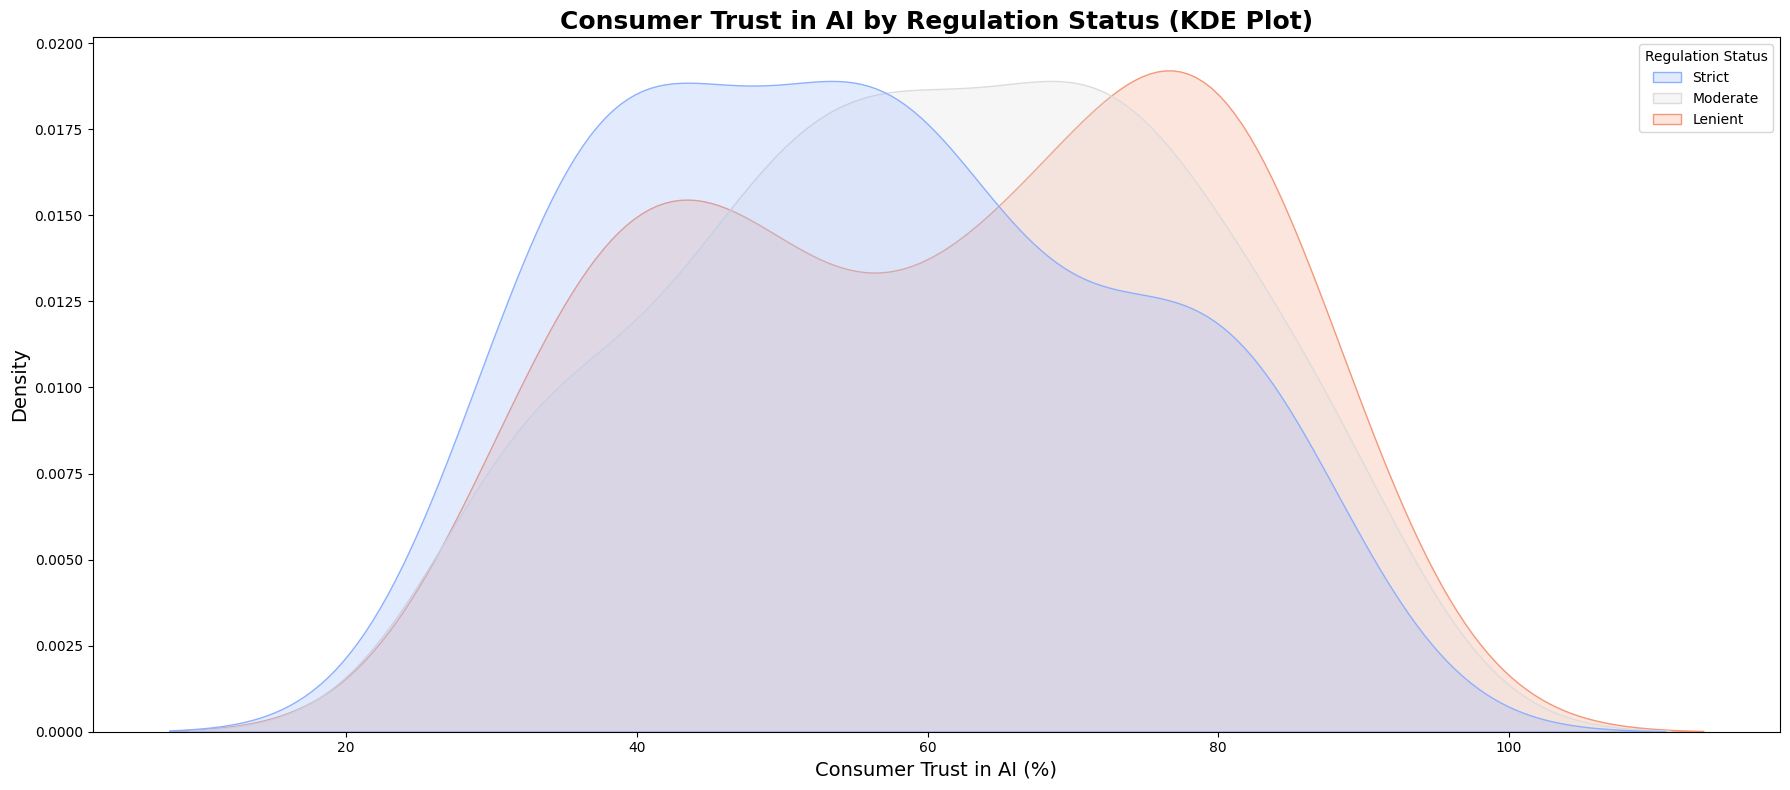

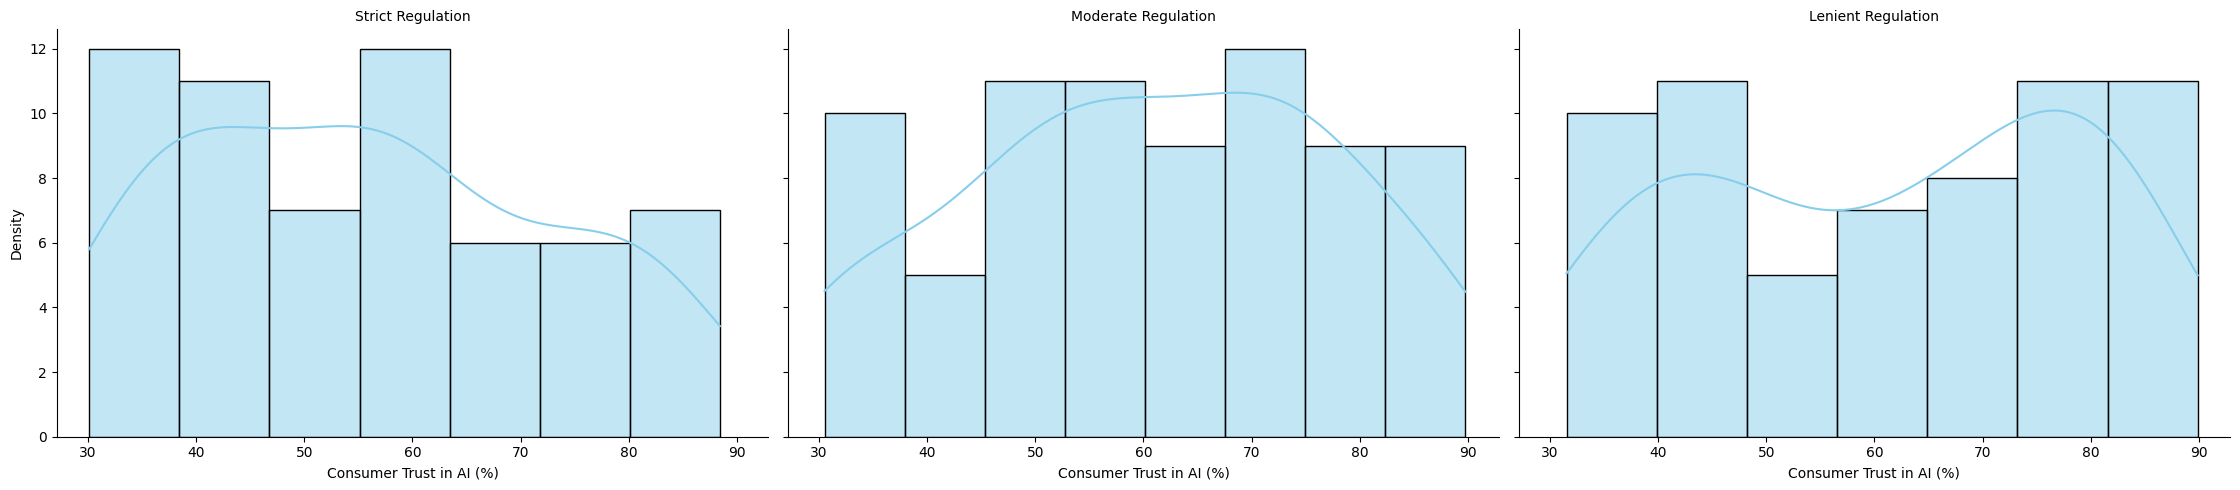

In [12]:
# Pre-processing (Ensure no missing values in key columns)
data.dropna(subset=['Regulation Status', 'Consumer Trust in AI (%)'], inplace=True)

# Create a figure for the plots
fig, axes = plt.subplots(1, 1, figsize=(18, 8))

# 1. KDE Plot (Kernel Density Estimate) - Smooth curve representation of the distribution
sns.kdeplot(data=data, x='Consumer Trust in AI (%)', hue='Regulation Status', fill=True, common_norm=False, ax=axes, palette='coolwarm')
axes.set_title('Consumer Trust in AI by Regulation Status (KDE Plot)', fontsize=18, weight='bold')
axes.set_xlabel('Consumer Trust in AI (%)', fontsize=14)
axes.set_ylabel('Density', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# ------------------------------------------------
# Pre-processing (Ensure no missing values in key columns)
data.dropna(subset=['Regulation Status', 'Consumer Trust in AI (%)'], inplace=True)

# 1. Facet Grid (Separate plots by Regulation Status)
g = sns.FacetGrid(data, col='Regulation Status', height=5, aspect=1.5)
g.map(sns.histplot, 'Consumer Trust in AI (%)', kde=True, color='skyblue')
g.set_titles("{col_name} Regulation")
g.set_axis_labels("Consumer Trust in AI (%)", "Density")
g.tight_layout()
plt.show()

# 5. Top AI Tools Analysis

/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_99989/1605855153.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Tool', data=tool_df.head(10), palette='viridis', ax=axes[0])


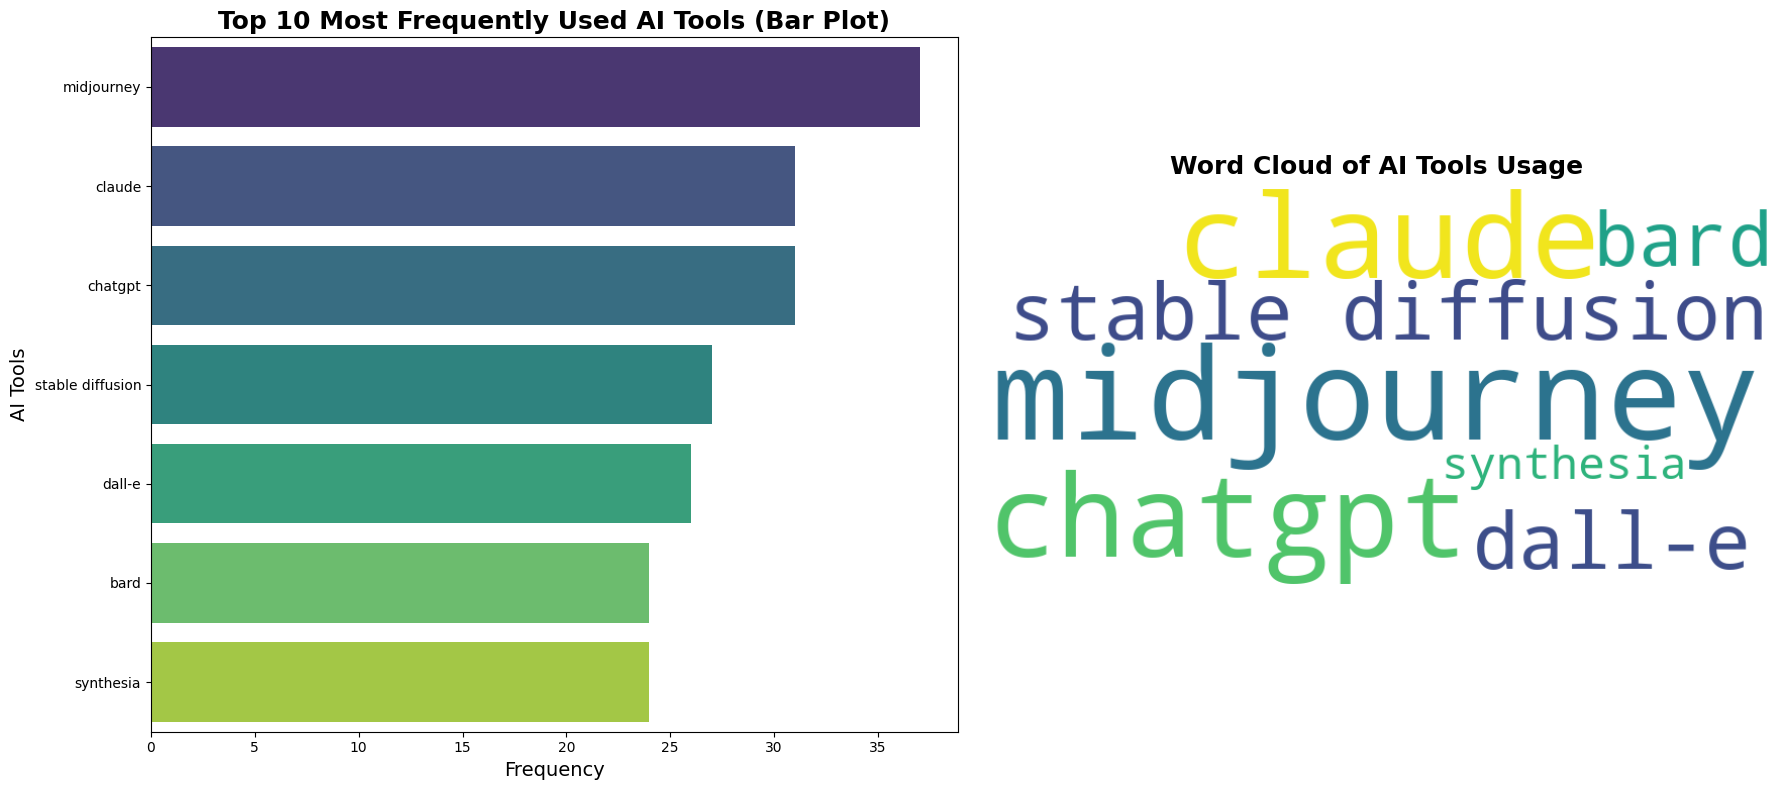

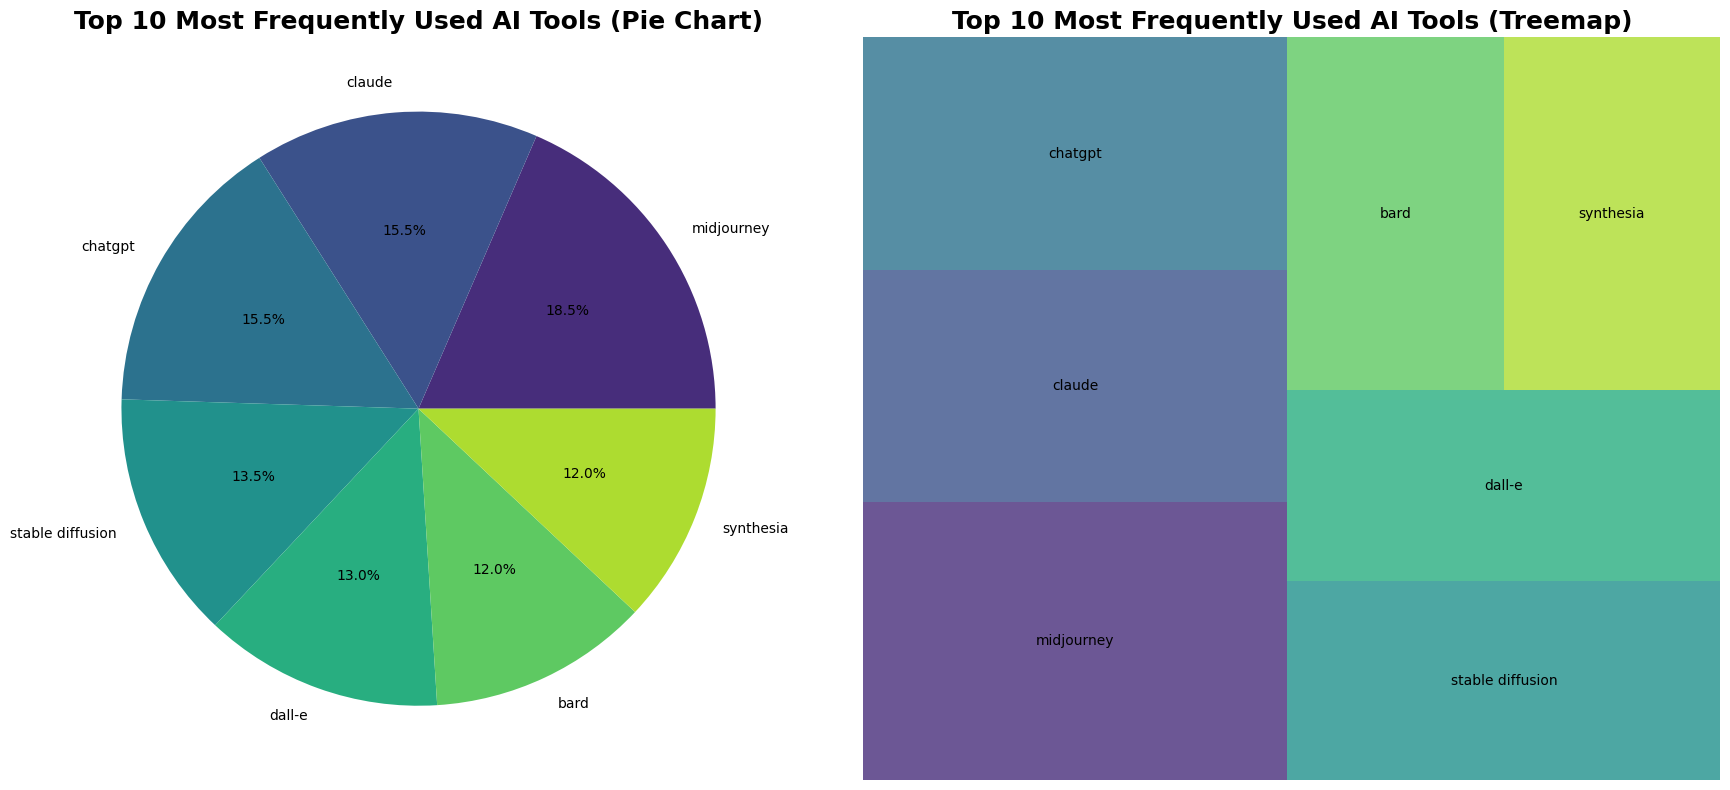

In [13]:
# Assuming 'data' is your DataFrame with the column 'Top AI Tools Used'
# Pre-processing (Ensure no missing values in the 'Top AI Tools Used' column)
data.dropna(subset=['Top AI Tools Used'], inplace=True)

# Clean and tokenize the 'Top AI Tools Used' column
tools_list = data['Top AI Tools Used'].str.split(',').apply(lambda x: [tool.strip().lower() for tool in x])
all_tools = [tool for sublist in tools_list for tool in sublist]  # Flatten the list

# Frequency count of each tool
tool_count = Counter(all_tools)

# Convert the counter object to a DataFrame for easier plotting
tool_df = pd.DataFrame(tool_count.items(), columns=['Tool', 'Frequency'])
tool_df = tool_df.sort_values(by='Frequency', ascending=False)

# Group 1: Bar Plot & Word Cloud
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Bar Plot
sns.barplot(x='Frequency', y='Tool', data=tool_df.head(10), palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Most Frequently Used AI Tools (Bar Plot)', fontsize=18, weight='bold')
axes[0].set_xlabel('Frequency', fontsize=14)
axes[0].set_ylabel('AI Tools', fontsize=14)

# 2. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tool_count)
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of AI Tools Usage', fontsize=18, weight='bold')

plt.tight_layout()
plt.show()

# Group 2: Pie Chart & Treemap
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Pie Chart
tool_df.head(10).plot.pie(y='Frequency', labels=tool_df.head(10)['Tool'], autopct='%1.1f%%', legend=False, colors=sns.color_palette('viridis', len(tool_df.head(10))), ax=axes[0])
axes[0].set_title('Top 10 Most Frequently Used AI Tools (Pie Chart)', fontsize=18, weight='bold')
axes[0].set_ylabel('')

# 2. Treemap (Requires squarify)
import squarify
squarify.plot(sizes=tool_df['Frequency'].head(10), label=tool_df['Tool'].head(10), color=sns.color_palette('viridis', len(tool_df.head(10))), alpha=0.8, ax=axes[1])
axes[1].set_title('Top 10 Most Frequently Used AI Tools (Treemap)', fontsize=18, weight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()
